In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


We'll continue to make use of the fuel economy dataset in this workspace.

In [2]:
cars_fuel = pd.read_csv("fuel-econ.csv")

### **Task 1**: 
Plot the distribution of combined fuel mileage (column 'comb', in miles per gallon) by manufacturer (column 'make'), for all manufacturers with at least eighty cars in the dataset. Consider which manufacturer order will convey the most information when constructing your final plot. 

**Hint**: Completing this exercise will take multiple steps! Add additional code cells as needed in order to achieve the goal.

In [3]:
# Count the number of cars for each manufacturer
manufacturer_counts = cars_fuel['make'].value_counts()
# Filter manufacturers with at least 80 cars
top_manufacturers = manufacturer_counts[manufacturer_counts >= 80].index
top_manufacturers


Index(['BMW', 'Mercedes-Benz', 'Porsche', 'Ford', 'Chevrolet', 'MINI', 'Audi',
       'Volkswagen', 'Hyundai', 'Dodge', 'Lexus', 'Kia', 'Cadillac', 'Toyota',
       'Infiniti', 'Honda', 'Jaguar', 'Mazda'],
      dtype='object', name='make')

In [4]:
#  Filter the main DataFrame to include only the top manufacturers
filtered_cars = cars_fuel[cars_fuel['make'].isin(top_manufacturers)].copy()
filtered_cars.head()


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6


In [5]:
# Calculate the average combined fuel mileage for each manufacturer
avg_comb_mileage = filtered_cars.groupby('make')['comb'].mean().sort_values(ascending=False)
avg_comb_mileage


make
Toyota           35.184424
Honda            31.588841
Mazda            30.397474
Hyundai          28.793620
Kia              27.843018
MINI             27.807288
Volkswagen       27.769875
Chevrolet        27.224809
Ford             26.796018
Lexus            23.870986
Audi             23.639240
BMW              23.004798
Infiniti         23.002081
Dodge            21.812190
Cadillac         21.773203
Mercedes-Benz    21.765718
Porsche          21.504786
Jaguar           21.429054
Name: comb, dtype: float64

C:\Users\Basmala\AppData\Local\Temp\ipykernel_4808\1187161781.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(data=filtered_cars, x='comb', y='make', order=avg_comb_mileage.index, palette='Set3')


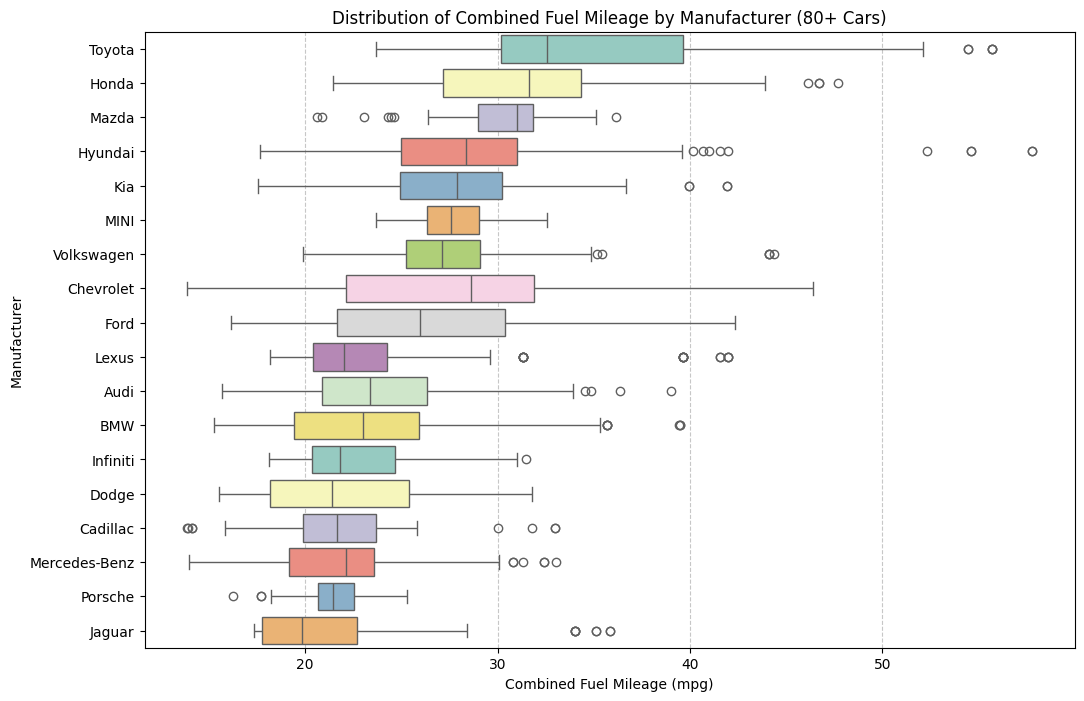

In [6]:

plt.figure(figsize=(12, 8))
sb.boxplot(data=filtered_cars, x='comb', y='make', order=avg_comb_mileage.index, palette='Set3')
plt.title('Distribution of Combined Fuel Mileage by Manufacturer (80+ Cars)')
plt.xlabel('Combined Fuel Mileage (mpg)')
plt.ylabel('Manufacturer')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


### **Task 2**: 
Continuing on from the previous task, plot the mean fuel efficiency for each manufacturer with at least 80 cars in the dataset.  Can you use error bars?

In [7]:

manufacturer_counts = cars_fuel['make'].value_counts()
top_manufacturers = manufacturer_counts[manufacturer_counts >= 80].index
filtered_cars = cars_fuel[cars_fuel['make'].isin(top_manufacturers)]
filtered_cars.head()


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6


In [8]:

mean_fuel_efficiency = filtered_cars.groupby('make')['comb'].agg(['mean', 'std']).reset_index()
mean_fuel_efficiency = mean_fuel_efficiency.sort_values(by='mean', ascending=False)
mean_fuel_efficiency.head()


,make,mean,std
16,Toyota,35.184424,8.717897
6,Honda,31.588841,5.899825
13,Mazda,30.397474,2.788899
7,Hyundai,28.793620,7.186954
10,Kia,27.843018,4.696605


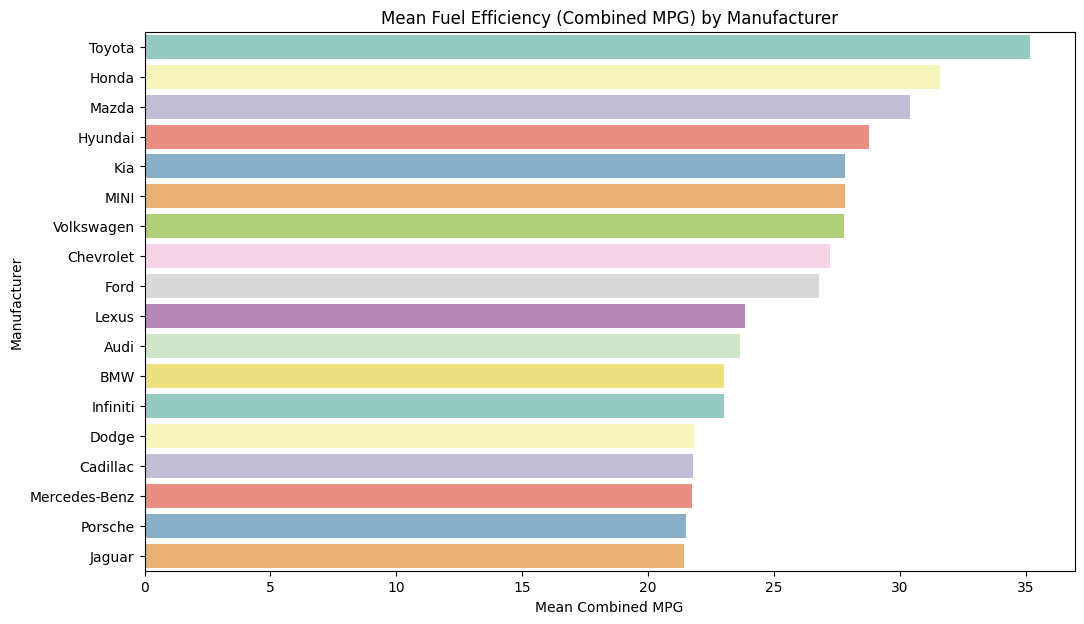

In [13]:
plt.figure(figsize=(12, 7))

sb.barplot(
    data=mean_fuel_efficiency,
    x='mean',
    y='make', hue='make', 
    palette='Set3',
     legend=False  ,
    errorbar='sd'  
    
)

plt.title('Mean Fuel Efficiency (Combined MPG) by Manufacturer')
plt.xlabel('Mean Combined MPG')
plt.ylabel('Manufacturer')
plt.show()

